In [1]:
include("src/Models.jl")
include("src/Params.jl")
include("src/Utils.jl")
using DifferentialEquations
using Plots; gr();

Base model with zero growth. Given \[KaiA\] = 1.0 uM the period should solve to 23.2 hours.

In [2]:
U0 = 3.5
X0 = [U0, 0, 0, 0, 0, 0]
A0 = 1.0
fATP = 1.0
p_rest = [kUTA, kTU, kTUA, kTDA, kDT, kDTA, kDS, kDSA, kSDA, kSU, kSUA, kUSA, kCIhyd,
     KA, A0, fATP, N, M]
@time attracted_to(kaiabc_growing!, X0, 500, [p_rest..., 1e5, U0])

 42.056062 seconds (22.48 M allocations: 3.089 GiB, 6.99% gc time, 45.74% compilation time)


(true, 0.4630475484019832, 23.203382929202014, 4.938864883926232)

Intruducing feedback. First try keeping the feedback threshold constant while changing doubling time

tau = 3

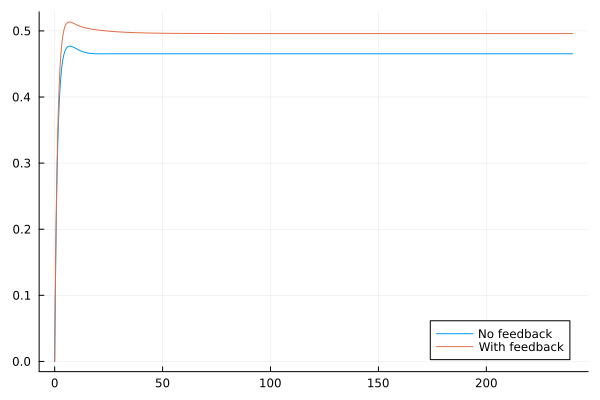

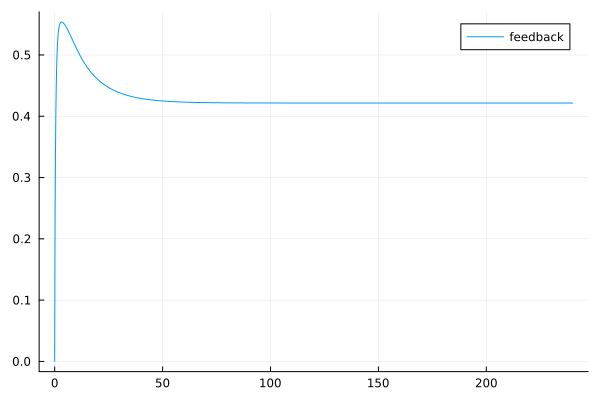

tau = 4

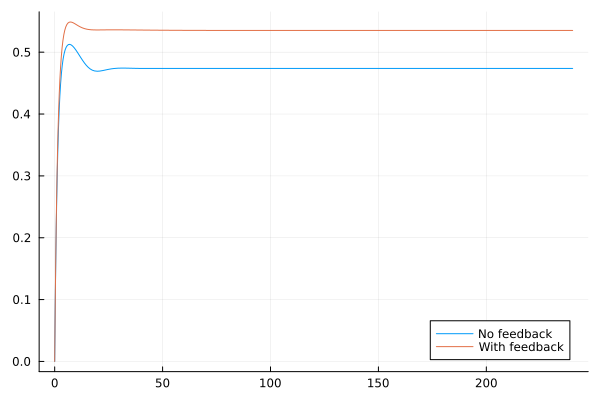

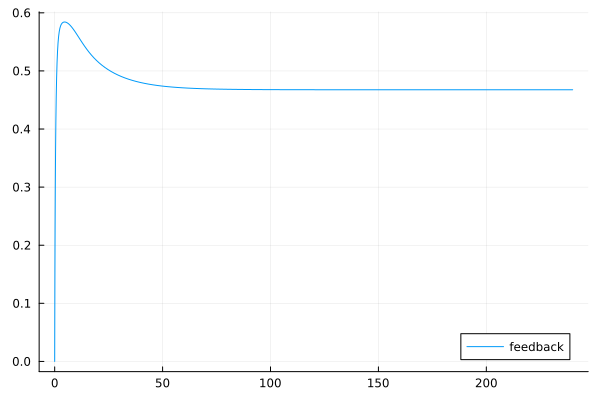

tau = 5

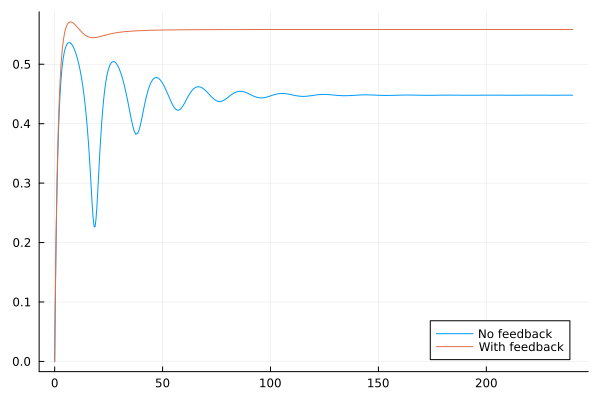

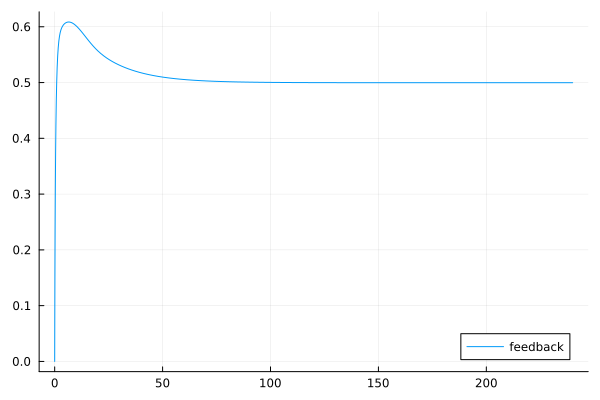

tau = 6

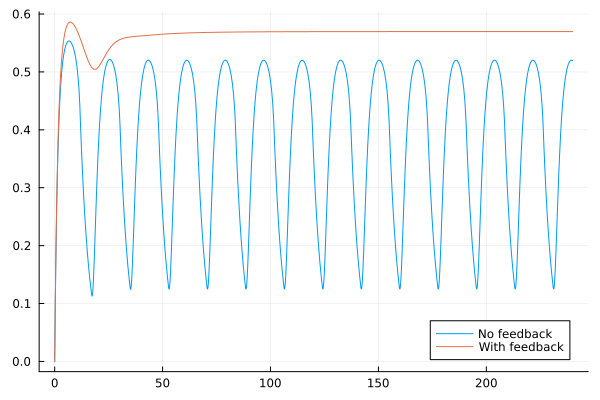

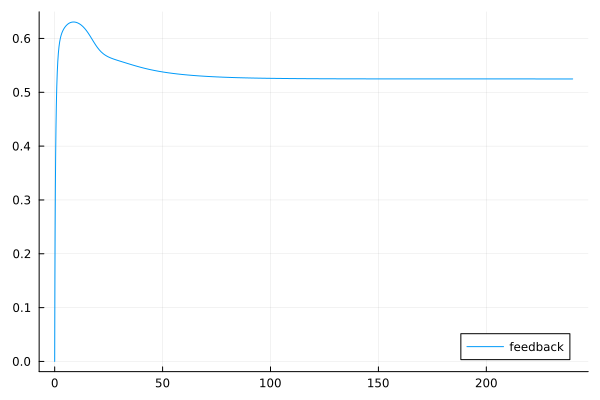

tau = 8

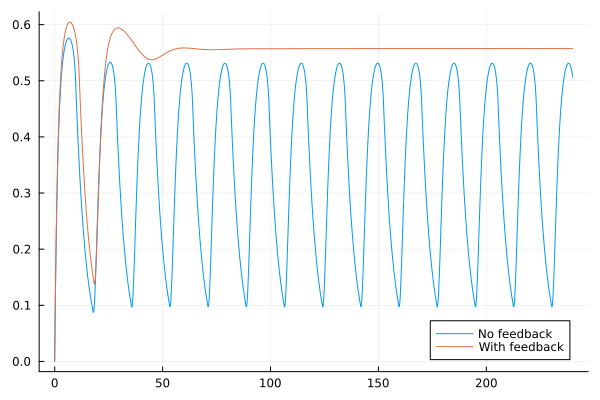

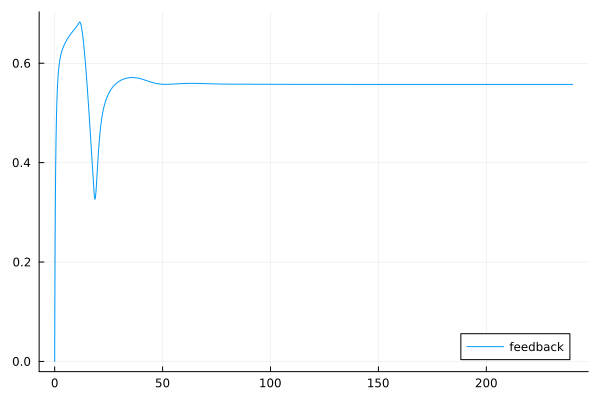

tau = 10

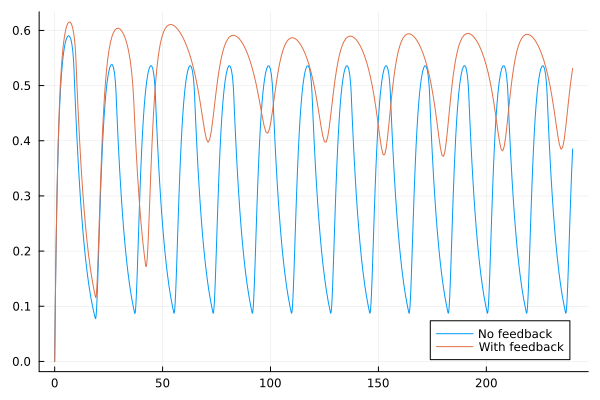

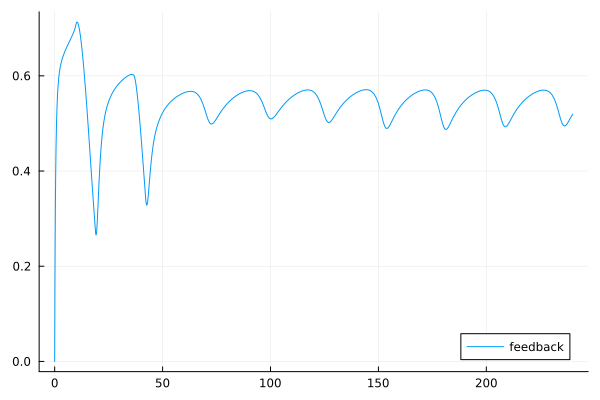

tau = 12

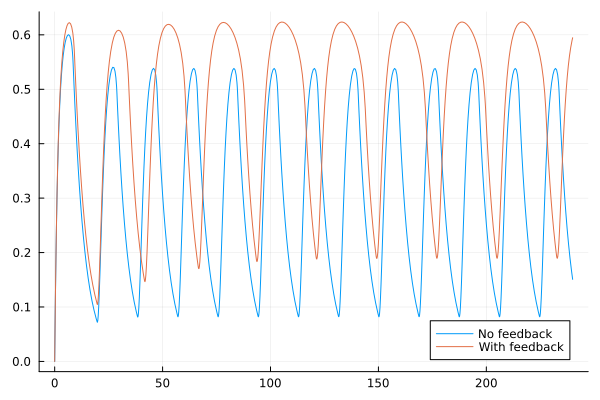

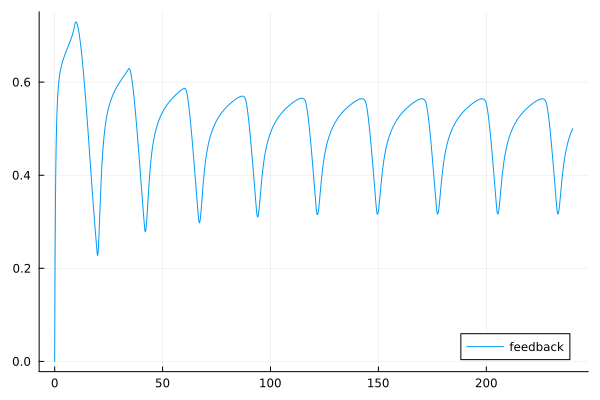

tau = 100

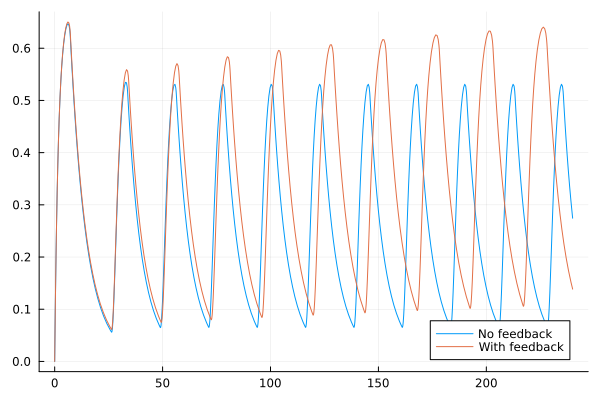

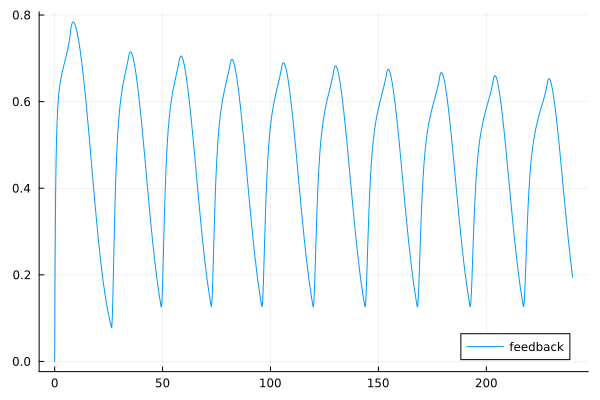

In [3]:
# fb(X, fb_p)
function fb(X, fb_p)
    U, T, D, S, DB, SB = X
    beta, K, n = fb_p
    
    # K is to the scale of S: concentration of S that gives half saturation
    beta*S^n/(S^n + K^n)
end

tau_vec = [3, 4, 5, 6, 8, 10, 12, 100]
#tau_vec = [7.9]
K = 0.02*U0    # unit of concentration
n = 1
beta = 1

TMAX = 240

for tau in tau_vec
    prob1 = ODEProblem(kaiabc_growing_TTFL!, X0, (0, TMAX), [p_rest..., tau, U0, fb, [beta, K, n]])
    sol1 = solve(prob1, reltol=1e-8, abstol=1e-8)
    prob2 = ODEProblem(kaiabc_growing!, X0, (0, TMAX), [p_rest..., tau, U0])
    sol2 = solve(prob2, reltol=1e-8, abstol=1e-8)

    print("tau = ", tau)
    plot(sol2.t, phospho_C(sol2.u), label="No feedback")
    plot!(sol1.t, phospho_C(sol1.u), label="With feedback") |> display

    plot(sol1.t, [ fb(X, [beta, K, n]) for X in sol1.u ], label="feedback") |> display
end

Now, plot period against doubling time but with different feedback threshold (with no growth as a reference)

Fixed params

In [4]:
function fb(X, fb_p)
    U, T, D, S, DB, SB = X
    beta, K, n = fb_p
    
    # K is to the scale of S: concentration of S that gives half saturation
    beta*S^n/(S^n + K^n)
end

U0 = 3.5
X0 = [U0, 0, 0, 0, 0, 0]
A0 = 1.0
fATP = 1.0

p_rest = [kUTA, kTU, kTUA, kTDA, kDT, kDTA, kDS, kDSA, kSDA, kSU, kSUA, kUSA, kCIhyd,
     KA, A0, fATP, N, M]

n = 1
beta = 2;

In [5]:
tau_vec = [3:0.05:5.95; 6:0.1:10; 11:19; 20:5:50]
amp_vec_nfb = zeros(length(tau_vec))
per_vec_nfb = zeros(length(tau_vec))

for i = 1:length(tau_vec)
    println(tau_vec[i])
    # rather large cutoff to aviod picking up damped oscillations
    converge, amp_mean, per_mean, phase = attracted_to(kaiabc_growing!, X0, 500, [p_rest..., tau_vec[i], U0],
                                                        avg_window=64, amp_cutoff=0.01)
    
    amp_vec_nfb[i] = amp_mean

    per_vec_nfb[i] = per_mean
    println("amplitude: ", amp_mean, ", period: ", per_mean)
end

3.0
amplitude: -1, period: -1
3.05
amplitude: -1, period: -1
3.1
amplitude: -1, period: -1
3.15
amplitude: -1, period: -1
3.2
amplitude: -1, period: -1
3.25
amplitude: -1, period: -1
3.3
amplitude: -1, period: -1
3.35
amplitude: -1, period: -1
3.4
amplitude: -1, period: -1
3.45
amplitude: -1, period: -1
3.5
amplitude: -1, period: -1
3.55
amplitude: -1, period: -1
3.6
amplitude: -1, period: -1
3.65
amplitude: -1, period: -1
3.7
amplitude: -1, period: -1
3.75
amplitude: -1, period: -1
3.8
amplitude: -1, period: -1
3.85
amplitude: -1, period: -1
3.9
amplitude: -1, period: -1
3.95
amplitude: -1, period: -1
4.0
amplitude: -1, period: -1
4.05
amplitude: -1, period: -1
4.1
amplitude: -1, period: -1
4.15
amplitude: -1, period: -1
4.2
amplitude: -1, period: -1
4.25
amplitude: -1, period: -1
4.3
amplitude: -1, period: -1
4.35
amplitude: -1, period: -1
4.4
amplitude: -1, period: -1
4.45
amplitude: -1, period: -1
4.5
amplitude: -1, period: -1
4.55
amplitude: -1, period: -1
4.6
amplitude: -1, perio

In [6]:
tau_vec = [3:0.05:5.95; 6:0.1:10; 11:19; 20:5:50]
amp_vec_K0005 = zeros(length(tau_vec))
per_vec_K0005 = zeros(length(tau_vec))
        
K = 0.005*U0

for i = 1:length(tau_vec)
    println(tau_vec[i])
    # rather large cutoff to aviod picking up damped oscillations
    converge, amp_mean, per_mean, phase = attracted_to(kaiabc_growing_TTFL!, X0, 500, 
                                                        [p_rest..., tau_vec[i], U0, fb, [beta, K, n]],
                                                        avg_window=64, amp_cutoff=0.01)
    
    amp_vec_K0005[i] = amp_mean

    per_vec_K0005[i] = per_mean
    println("amplitude: ", amp_mean, ", period: ", per_mean)
end

3.0
amplitude: -1, period: -1
3.05
amplitude: -1, period: -1
3.1
amplitude: -1, period: -1
3.15
amplitude: -1, period: -1
3.2
amplitude: -1, period: -1
3.25
amplitude: -1, period: -1
3.3
amplitude: -1, period: -1
3.35
amplitude: -1, period: -1
3.4
amplitude: -1, period: -1
3.45
amplitude: 0.2803011880180062, period: 13.57659924712765
3.5
amplitude: 0.2913362436184662, period: 13.482980013026623
3.55
amplitude: 0.29885976318610524, period: 13.398488902946369
3.6
amplitude: 0.3047617272649715, period: 13.33999044724706
3.65
amplitude: 0.30975870653568394, period: 13.295946536035226
3.7
amplitude: 0.3140492160752662, period: 13.255863715274645
3.75
amplitude: 0.3177258482162182, period: 13.22656523212395
3.8
amplitude: 0.32099714177409977, period: 13.200455822709289
3.85
amplitude: 0.32399673253515293, period: 13.18493637976496
3.9
amplitude: 0.3267357350211135, period: 13.170478274362239
3.95
amplitude: 0.3292780825406844, period: 13.161791659270271
4.0
amplitude: 0.33164340952858895, pe

In [7]:
tau_vec = [3:0.05:5.95; 6:0.1:10; 11:19; 20:5:50]
amp_vec_K001 = zeros(length(tau_vec))
per_vec_K001 = zeros(length(tau_vec))
        
K = 0.01*U0

for i = 1:length(tau_vec)
    println(tau_vec[i])
    # rather large cutoff to aviod picking up damped oscillations
    converge, amp_mean, per_mean, phase = attracted_to(kaiabc_growing_TTFL!, X0, 500, 
                                                        [p_rest..., tau_vec[i], U0, fb, [beta, K, n]],
                                                        avg_window=64, amp_cutoff=0.01)
    
    amp_vec_K001[i] = amp_mean

    per_vec_K001[i] = per_mean
    println("amplitude: ", amp_mean, ", period: ", per_mean)
end

3.0
amplitude: -1, period: -1
3.05
amplitude: -1, period: -1
3.1
amplitude: -1, period: -1
3.15
amplitude: -1, period: -1
3.2
amplitude: -1, period: -1
3.25
amplitude: -1, period: -1
3.3
amplitude: -1, period: -1
3.35
amplitude: -1, period: -1
3.4
amplitude: -1, period: -1
3.45
amplitude: -1, period: -1
3.5
amplitude: -1, period: -1
3.55
amplitude: -1, period: -1
3.6
amplitude: -1, period: -1
3.65
amplitude: 0.2888085541021046, period: 14.451598992221971
3.7
amplitude: 0.29930451582946144, period: 14.369342886826182
3.75
amplitude: 0.3066818218391011, period: 14.28893848771631
3.8
amplitude: 0.31258576456185144, period: 14.22798909243091
3.85
amplitude: 0.317468764983868, period: 14.182332964189317
3.9
amplitude: 0.32173587501870965, period: 14.14331684166092
3.95
amplitude: 0.3255477590270467, period: 14.110147858346464
4.0
amplitude: 0.32893279500611905, period: 14.078420840164652
4.05
amplitude: 0.332054983418277, period: 14.06097475273881
4.1
amplitude: 0.3348196686243834, period: 

In [8]:
tau_vec = [3:0.05:5.95; 6:0.1:10; 11:19; 20:5:50]
amp_vec_K002 = zeros(length(tau_vec))
per_vec_K002 = zeros(length(tau_vec))
        
K = 0.02*U0

for i = 1:length(tau_vec)
    println(tau_vec[i])
    # rather large cutoff to aviod picking up damped oscillations
    converge, amp_mean, per_mean, phase = attracted_to(kaiabc_growing_TTFL!, X0, 500, 
                                                        [p_rest..., tau_vec[i], U0, fb, [beta, K, n]],
                                                        avg_window=64, amp_cutoff=0.01)
    
    amp_vec_K002[i] = amp_mean

    per_vec_K002[i] = per_mean
    println("amplitude: ", amp_mean, ", period: ", per_mean)
end

3.0
amplitude: -1, period: -1
3.05
amplitude: -1, period: -1
3.1
amplitude: -1, period: -1
3.15
amplitude: -1, period: -1
3.2
amplitude: -1, period: -1
3.25
amplitude: -1, period: -1
3.3
amplitude: -1, period: -1
3.35
amplitude: -1, period: -1
3.4
amplitude: -1, period: -1
3.45
amplitude: -1, period: -1
3.5
amplitude: -1, period: -1
3.55
amplitude: -1, period: -1
3.6
amplitude: -1, period: -1
3.65
amplitude: -1, period: -1
3.7
amplitude: -1, period: -1
3.75
amplitude: -1, period: -1
3.8
amplitude: -1, period: -1
3.85
amplitude: -1, period: -1
3.9
amplitude: -1, period: -1
3.95
amplitude: -1, period: -1
4.0
amplitude: -1, period: -1
4.05
amplitude: -1, period: -1
4.1
amplitude: 0.29080051913633365, period: 16.466779699508134
4.15
amplitude: 0.30671819522348776, period: 16.40160717893893
4.2
amplitude: 0.31589437895858613, period: 16.329072780054535
4.25
amplitude: 0.3227350184803484, period: 16.243774214356147
4.3
amplitude: 0.32844716779490835, period: 16.184321665077984
4.35
amplitude

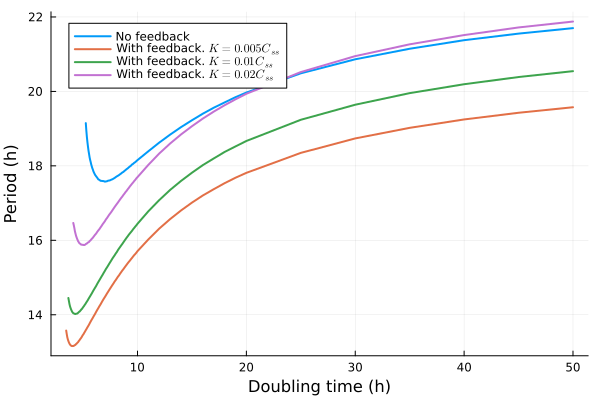

In [9]:
tau_vec = [3:0.05:5.95; 6:0.1:10; 11:19; 20:5:50]
plt = plot(tau_vec[amp_vec_nfb .!= -1], per_vec_nfb[amp_vec_nfb .!= -1], label="No feedback", linewidth=2)
xlabel!(plt, "Doubling time (h)")
ylabel!(plt, "Period (h)")

plot!(plt, tau_vec[amp_vec_K0005 .!= -1], per_vec_K0005[amp_vec_K0005 .!= -1], label="With feedback. \$K = 0.005C_{ss}\$", linewidth=2)

plot!(plt, tau_vec[amp_vec_K001 .!= -1], per_vec_K001[amp_vec_K001 .!= -1], label="With feedback. \$K = 0.01C_{ss}\$", linewidth=2)

plot!(plt, tau_vec[amp_vec_K002 .!= -1], per_vec_K002[amp_vec_K002 .!= -1], label="With feedback. \$K = 0.02C_{ss}\$", linewidth=2)

display(plt)

Zoom in

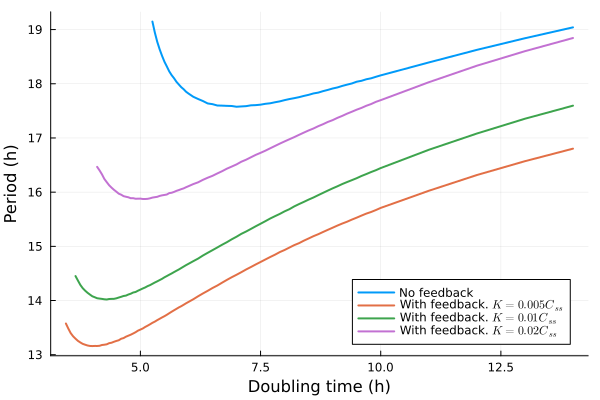

In [10]:
tau_max = 15
plt = plot(tau_vec[tau_vec .< tau_max .&& amp_vec_nfb .!= -1], 
    per_vec_nfb[tau_vec .< tau_max .&& amp_vec_nfb .!= -1], label="No feedback", linewidth=2)
xlabel!(plt, "Doubling time (h)")
ylabel!(plt, "Period (h)")

plot!(plt, tau_vec[tau_vec .< tau_max .&& amp_vec_K0005 .!= -1], 
    per_vec_K0005[tau_vec .< tau_max .&& amp_vec_K0005 .!= -1], label="With feedback. \$K = 0.005C_{ss}\$", linewidth=2)

plot!(plt, tau_vec[tau_vec .< tau_max .&& amp_vec_K001 .!= -1], 
    per_vec_K001[tau_vec .< tau_max .&& amp_vec_K001 .!= -1], label="With feedback. \$K = 0.01C_{ss}\$", linewidth=2)

plot!(plt, tau_vec[tau_vec .< tau_max .&& amp_vec_K002 .!= -1], 
    per_vec_K002[tau_vec .< tau_max .&& amp_vec_K002 .!= -1], label="With feedback. \$K = 0.02C_{ss}\$", linewidth=2)

#ylims!(16, 28)
display(plt)